## 1. Understanding the dataset

### Importing the necessary libraries

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams

ModuleNotFoundError: No module named 'imblearn'

### Uploading the dataset

In [4]:
df = pd.read_csv('bids.csv')
bidder_data = pd.read_csv('train.csv')

In [5]:
df.shape

(7656334, 9)

In [9]:
df['bid_id'].nunique()

7656334

In [10]:
df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [11]:
bidder_data.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


### Dataset rows and columns


In [12]:
df.shape

(7656334, 9)

In [13]:
bidder_data.shape

(2013, 4)

### Sorting values according to bidder id's

In [14]:
df.sort_values(by='bidder_id' ,ascending = True)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas
...,...,...,...,...,...,...,...,...,...
2147278,2147278,ffd62646d600b759a985d45918bd6f0431vmz,nnciv,mobile,phone195,9771693000000000,id,93.227.210.179,vasstdc27m7nks3
627729,627729,ffd62646d600b759a985d45918bd6f0431vmz,e26p7,mobile,phone142,9762918052631578,id,7.199.77.86,vasstdc27m7nks3
1577704,1577704,ffd62646d600b759a985d45918bd6f0431vmz,1m1qq,mobile,phone4,9768442526315789,id,3.210.112.183,vasstdc27m7nks3
1470059,1470059,ffd62646d600b759a985d45918bd6f0431vmz,jpxg4,mobile,phone4,9767929105263157,id,245.229.191.152,vasstdc27m7nks3


### Merge the two datasets

In [15]:
df = pd.merge(left=df, right=bidder_data, how='left', left_on='bidder_id', right_on='bidder_id')

In [16]:
df.shape

(7656334, 12)

In [17]:
df.isnull().sum()

bid_id                   0
bidder_id                0
auction                  0
merchandise              0
device                   0
time                     0
country               8859
ip                       0
url                      0
payment_account    4585110
address            4585110
outcome            4585110
dtype: int64

### Replacing null values of country by mode

In [18]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [19]:
df.isnull().sum()

bid_id                   0
bidder_id                0
auction                  0
merchandise              0
device                   0
time                     0
country                  0
ip                       0
url                      0
payment_account    4585110
address            4585110
outcome            4585110
dtype: int64

## 2.Exploring Data

### Unique bidder id values

In [20]:
df["bidder_id"].value_counts()

f5b2bbad20d1d7ded3ed960393bec0f40u6hn    515033
197e90906939267ace2422e78e8e83889znqp    236413
a58ace8b671a7531c88814bc86b2a34cf0crb    192565
13b022681839a351f07d017c0edd9ed6ao2w5    168995
9655ccc7c0c193f1549475f02c54dce45kjw7    161935
                                          ...  
7f099ea351bc35b2d1b365732c859688qq3th         1
35f2af180d7711f705376a66165c4185e0gvy         1
3b31a6f093ca6eb5a58568ac830510banmyet         1
970987b919bb27f09db853fd51f144a0gg5kz         1
01f498a0992d280de63ec346692efb2blckg2         1
Name: bidder_id, Length: 6614, dtype: int64

In [21]:
df["bidder_id"].nunique()

6614

### Unique payment account details

In [22]:
bidder_data["payment_account"].value_counts()

a3d2de7675556553a5f08e4c88d2c228754av    1
1d3d9157bbdd65dc8519367f5fed1bbcdy62t    1
a3d2de7675556553a5f08e4c88d2c228o6hvo    1
a3d2de7675556553a5f08e4c88d2c228sjfrl    1
713f501d38e7bb93e2754a7717ef3278i982a    1
                                        ..
a3d2de7675556553a5f08e4c88d2c228yb9aq    1
a3d2de7675556553a5f08e4c88d2c228anxa0    1
f2f793a2cf083c36627c022421aa0d954b71e    1
31b07e6f832c3f123c20c51db4a80bf8oqrrz    1
fbe0ce34d6546ebd9e4c63afc68b085byd2tf    1
Name: payment_account, Length: 2013, dtype: int64

In [23]:
bidder_data["payment_account"].nunique()

2013

### Sorting address

In [24]:
bidder_data["address"].sort_values().head()

663     000475f9223b613ae0f0939fb7e580ebxi9hj
1623    004ea345038ec0fe71240e0a6b440b1dzsg5f
14      00de21ff3627811075faf2a3a0880053yi40s
1813    00fbee2e7b516ea80cd819debcb5b0c9rpj1a
1388    011452b59e47a53fa1818c5d0765dea5pv3f9
Name: address, dtype: object

In [25]:
bidder_data["address"].value_counts()

a3d2de7675556553a5f08e4c88d2c228vt0u4    1
1a61a395d3e1cca6afe1f1f830892be1jaxqx    1
1a2d1b624930fe3e707d43e75e92e81e3q8z4    1
3ee4b535441c1b35d3f9aa3f7ed5ab881dlqk    1
3f4a8f4df5b2596cf9d3e41977bd0a511c1tb    1
                                        ..
a3d2de7675556553a5f08e4c88d2c228uy4h5    1
d20c4c76e701af07f7d77db657e7ba70cq4w1    1
7c008e5dfba281d7403c5a02f3db22dchmh3o    1
000475f9223b613ae0f0939fb7e580ebxi9hj    1
a3d2de7675556553a5f08e4c88d2c228fib6p    1
Name: address, Length: 2013, dtype: int64

In [26]:
bidder_data["address"].nunique()

2013

### Number of bids made by each bidder id

In [27]:
df.groupby("bidder_id")["bid_id"].count().reset_index().sort_values(by="bid_id", ascending=False)

,bidder_id,bid_id
6372,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,515033
639,197e90906939267ace2422e78e8e83889znqp,236413
4292,a58ace8b671a7531c88814bc86b2a34cf0crb,192565
464,13b022681839a351f07d017c0edd9ed6ao2w5,168995
3887,9655ccc7c0c193f1549475f02c54dce45kjw7,161935
...,...,...
3829,9390ac0a97e75b3b56fe63695d27a82euhv69,1
3828,938d11f6906f58ce232cb6cfdf6d853aylmon,1
3817,9349befb45c4869b68e82a1944f4f01377cpz,1
3816,932fcaac5a6293741d82ae81af9013e86y0h5,1


### Totals

In [28]:
print(f"total row in dataset:          {len(df)}")
print(f"total bids in dataset:         {len(df['bid_id'].unique())}")
print(f"total bidder in dataset:      {len(df['bidder_id'].unique())}")
print(f"total payment in dataset:     {len(df['payment_account'].unique())}")
print(f"total address in dataset:     {len(df['address'].unique())}")
print(f"total auction in dataset:     {len(df['auction'].unique())}")
print(f"total merchandise in dataset: {len(df['merchandise'].unique())}")
print(f"total device in dataset:      {len(df['device'].unique())}")
print(f"total country in dataset:     {len(df['country'].unique())}")
print(f"total ip in dataset:          {len(df['ip'].unique())}")
print(f"total url in dataset:         {len(df['url'].unique())}")

total row in dataset:          7656334
total bids in dataset:         7656334
total bidder in dataset:      6614
total payment in dataset:     1985
total address in dataset:     1985
total auction in dataset:     15051
total merchandise in dataset: 10
total device in dataset:      7351
total country in dataset:     199
total ip in dataset:          2303991
total url in dataset:         1786351


### Human and robot bids

In [29]:
robots = bidder_data[bidder_data['outcome']==1]
human  = bidder_data[bidder_data['outcome']==0]
print(robots.info())
print(human.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 21 to 2001
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        103 non-null    object 
 1   payment_account  103 non-null    object 
 2   address          103 non-null    object 
 3   outcome          103 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        1910 non-null   object 
 1   payment_account  1910 non-null   object 
 2   address          1910 non-null   object 
 3   outcome          1910 non-null   float64
dtypes: float64(1), object(3)
memory usage: 74.6+ KB
None


### Total unique bot and human bids

In [30]:
bidder_data['outcome'].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

### Averages

In [31]:
print(f"average bids per robot: %.0f" % float(len(
    df[df['outcome'] == 1])/len(df[df['outcome'] == 1]['bidder_id'].unique())))
print(f"average bids per human:  %.0f" % float(len(
    df[df['outcome'] == 0])/len(df[df['outcome'] == 0]['bidder_id'].unique())))
print(f"average bids per auction by robot: %.0f" % float(
    len(df[df['outcome'] == 1])/len(df[df['outcome'] == 1]['auction'].unique())))
print(f"average bids per auction by human:  %.0f" % float(
    len(df[df['outcome'] == 0])/len(df[df['outcome'] == 0]['auction'].unique())))
print(f"average bids per device by robot: %.0f" % float(
    len(df[df['outcome'] == 1])/len(df[df['outcome'] == 1]['device'].unique())))
print(f"average bids per device by human:  %.0f" % float(
    len(df[df['outcome'] == 0])/len(df[df['outcome'] == 0]['device'].unique())))
print(f"average bids per ip by robots: %.2f" % float(
    len(df[df['outcome'] == 1])/len(df[df['outcome'] == 1]['ip'].unique())))
print(f"average bids per ip by human:  %.2f" % float(
    len(df[df['outcome'] == 0])/len(df[df['outcome'] == 0]['ip'].unique())))
print(f"average bids per url by robot: %.2f" % float(
    len(df[df['outcome'] == 1])/len(df[df['outcome'] == 1]['url'].unique())))
print(f"average bids per url by human:  %.2f" % float(
    len(df[df['outcome'] == 0])/len(df[df['outcome'] == 0]['url'].unique())))


average bids per robot: 4004
average bids per human:  1414
average bids per auction by robot: 65
average bids per auction by human:  217
average bids per device by robot: 134
average bids per device by human:  516
average bids per ip by robots: 1.79
average bids per ip by human:  3.18
average bids per url by robot: 7.52
average bids per url by human:  4.36


## Feature Engineering - ONLY BOTS

### 1. Bidding time difference per user (bidder_id)

In [32]:
df = df.sort_values(by=['time'])
df['timediffs'] = df.groupby('bidder_id')['time'].transform(pd.Series.diff)
df['timediffs'].sort_values(ascending = True)[:10]

2351196    0.0
4831610    0.0
4831612    0.0
4831614    0.0
4831618    0.0
4831585    0.0
4831586    0.0
4831580    0.0
4831579    0.0
4831554    0.0
Name: timediffs, dtype: float64

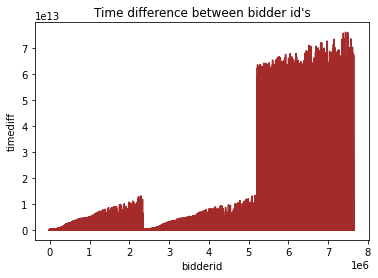

In [33]:
df["timediffs"].plot(kind='line', rot=0,xlabel= 'bidderid', ylabel='timediff',title = "Time difference between bidder id's", color="brown");

### 2. Number of bot bids a user made per auction

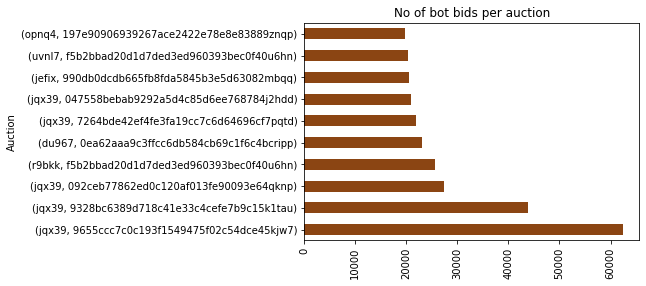

In [34]:
bids_per_auction = df.groupby(['auction', 'bidder_id']).size().sort_values(ascending = False)
bids_per_auction[:10].plot(kind='barh', rot=0,xlabel= 'Auction', ylabel='No of bot bids',title = "No of bot bids per auction", color="saddlebrown");
bids_per_auction
plt.xticks(rotation=90);

### 3. Number of bot bids per country

In [35]:
pbots_country = df[df['outcome'] == 1].groupby('country').size().sort_values(ascending = False)
pbots_country[:10]

country
in    86649
us    66663
id    20495
de    18530
th    17282
za    13364
ru    11100
mx    10848
my    10488
ca     9205
dtype: int64

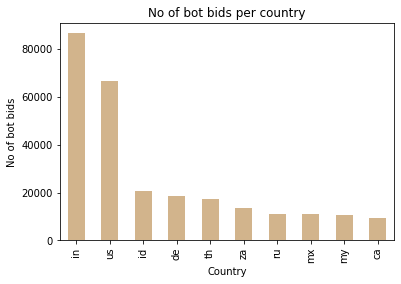

In [36]:
pbots_country[:10].plot(kind='bar', rot=0,xlabel= 'Country', ylabel='No of bot bids',title = "No of bot bids per country", color="tan");
pbots_country
plt.xticks(rotation=90);

### 4. Number of bot bids per device

In [37]:
pbots_device = df[df['outcome'] == 1].groupby('device').size().sort_values(ascending = False)
pbots_device = pbots_device.fillna(0)
pbots_device[:10]

device
phone17     16219
phone119    14833
phone46     14550
phone4      14102
phone65      9965
phone62      9406
phone13      8923
phone28      7721
phone115     4773
phone122     4752
dtype: int64

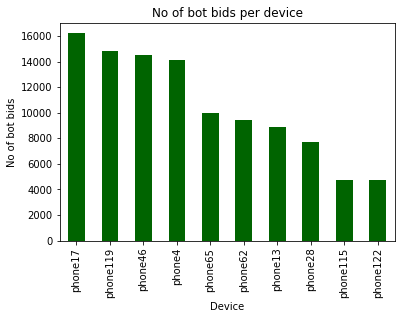

In [38]:
pbots_device[:10].plot(kind='bar', rot=0,xlabel= 'Device', ylabel='No of bot bids',title = "No of bot bids per device", color="darkgreen");
pbots_device
plt.xticks(rotation=90);

### 5. Number of bot bids per ip

In [39]:
ip_bids = df.groupby('bidder_id')['ip'].nunique().sort_values(ascending = False)
ip_bids[:10]

bidder_id
9655ccc7c0c193f1549475f02c54dce45kjw7    111918
197e90906939267ace2422e78e8e83889znqp    109159
f5b2bbad20d1d7ded3ed960393bec0f40u6hn    101275
29c103503e1d6ace5626fb07a5ab0dafrtjvs     58150
a58ace8b671a7531c88814bc86b2a34cf0crb     53405
0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp     52257
aa5f360084278b35d746fa6af3a7a1a5ra3xe     51891
13b022681839a351f07d017c0edd9ed6ao2w5     45984
2240c4ebe5702228bbd2bb3b988de7086zge8     44619
092ceb77862ed0c120af013fe90093e64qknp     34395
Name: ip, dtype: int64

In [ ]:
ip_bids[:10].plot(kind='barh', rot=0,xlabel= 'bidderid', ylabel='No of bot bids',title = "No of bot bids per bidder-id", color="tan")
ip_bids;

### Unique elements in every column

In [41]:
df.apply(pd.Series.nunique)

bid_id             7656334
bidder_id             6614
auction              15051
merchandise             10
device                7351
time                776529
country                199
ip                 2303991
url                1786351
payment_account       1984
address               1984
outcome                  2
timediffs            37673
dtype: int64

### Frequency of Top 10 frequent bidders in the dataset

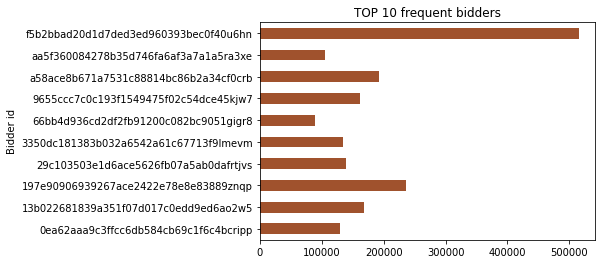

In [42]:
df["bidder_id"].value_counts()[:10].sort_index().plot(kind='barh', ylabel = "Frequency", xlabel = "Bidder id", rot=0,title = "TOP 10 frequent bidders", color = "sienna");

### Occurence of Merchandise in the dataset

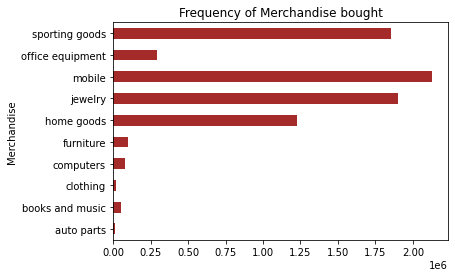

In [43]:
df["merchandise"].value_counts().sort_index().plot(kind='barh', ylabel = "Frequency", xlabel = "Merchandise", rot=0,title = "Frequency of Merchandise bought", color='brown');

### Top 10 auctions that took places most frequently

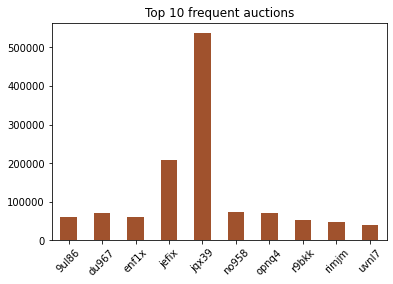

In [44]:
df["auction"].value_counts()[:10].sort_index().plot(kind='bar', rot=0,title = "Top 10 frequent auctions", color="sienna");
plt.xticks(rotation = 45);

## 3. Training/Modeling the dataset

### Converting the columns into categories

In [45]:
df['bid_id'] = df['bid_id'].astype("category")
df['bidder_id'] = df['bidder_id'].astype("category")
df['auction'] = df['auction'].astype("category")
df['merchandise'] =df['merchandise'].astype("category")
df['device'] = df['device'].astype("category")
df['country'] = df['country'].astype("category")
df['url'] = df['url'].astype("category")
df['ip'] = df['ip'].astype("category")
df['payment_account'] = df['payment_account'].astype("category")
df['address'] = df['address'].astype("category")

In [46]:
dict(enumerate(df['bid_id'].cat.categories))

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [47]:
dict(enumerate(df['bidder_id'].cat.categories))     

{0: '001068c415025a009fee375a12cff4fcnht8y',
 1: '002d229ffb247009810828f648afc2ef593rb',
 2: '0030a2dd87ad2733e0873062e4f83954mkj86',
 3: '003180b29c6a5f8f1d84a6b7b6f7be57tjj1o',
 4: '00486a11dff552c4bd7696265724ff81yeo9v',
 5: '0051aef3fdeacdadba664b9b3b07e04e4coc6',
 6: '0053b78cde37c4384a20d2da9aa4272aym4pb',
 7: '0061edfc5b07ff3d70d693883a38d370oy4fs',
 8: '00862324eb508ca5202b6d4e5f1a80fc3t3lp',
 9: '009479273c288b1dd096dc3087653499lrx3c',
 10: '009cee781e8414f7fb55b2f92157e9dbu0y6o',
 11: '00a0517965f18610417ee784a05f494d4dw6e',
 12: '00a79ebd15f0b24a0a3b5794457cd8ed7dng1',
 13: '00b519ec8ed5e370328451379bb708a306eoj',
 14: '00cc97158e6f4cb8eac3c0075918b7ffi5k8o',
 15: '00ceb1b66fc6c08f2e1b7937b5bc7f870qn5k',
 16: '00dd948c3a88f7b68f1952dbeeac68ffb6qoc',
 17: '00e0f614d9dd32dd27f6080f472d2934emlos',
 18: '01067975436d123f717ee5aba0dd4bbfa0937',
 19: '010e5ed5eb439e0daf1870a0b426e32cztbdt',
 20: '0113d101ec6aabd354adac645a1ec3e82ln88',
 21: '012441119bcf83b23d4768bb72cea6d6carua'

In [48]:
dict(enumerate(df['auction'].cat.categories)) 

{0: '00270',
 1: '008vv',
 2: '00cwr',
 3: '00do0',
 4: '00hjy',
 5: '00hm5',
 6: '00llo',
 7: '00mip',
 8: '00p4a',
 9: '00sj9',
 10: '010lx',
 11: '012sd',
 12: '012wh',
 13: '0143v',
 14: '014m6',
 15: '01b3e',
 16: '01dgm',
 17: '01jh9',
 18: '01l8f',
 19: '01lq0',
 20: '01sru',
 21: '01znr',
 22: '021em',
 23: '022yv',
 24: '023e8',
 25: '02a13',
 26: '02aip',
 27: '02c9i',
 28: '02jrl',
 29: '02lmg',
 30: '02mb5',
 31: '02ubh',
 32: '02wc0',
 33: '02wcx',
 34: '030jb',
 35: '030o3',
 36: '0326d',
 37: '03693',
 38: '0395d',
 39: '03bcd',
 40: '03k3a',
 41: '03n0o',
 42: '03oel',
 43: '03ou3',
 44: '03w40',
 45: '03w4b',
 46: '03x57',
 47: '03z14',
 48: '042xe',
 49: '0457f',
 50: '045m6',
 51: '04b66',
 52: '04hdj',
 53: '04i68',
 54: '04im1',
 55: '04os0',
 56: '04qkl',
 57: '04qrv',
 58: '04rx4',
 59: '04tfu',
 60: '04vyz',
 61: '04znq',
 62: '054su',
 63: '055te',
 64: '05bab',
 65: '05bdq',
 66: '05d6w',
 67: '05esr',
 68: '05gw0',
 69: '05j8q',
 70: '05qlz',
 71: '05smu',
 7

In [49]:
dict(enumerate(df['merchandise'].cat.categories)) 

{0: 'auto parts',
 1: 'books and music',
 2: 'clothing',
 3: 'computers',
 4: 'furniture',
 5: 'home goods',
 6: 'jewelry',
 7: 'mobile',
 8: 'office equipment',
 9: 'sporting goods'}

In [50]:
dict(enumerate(df['device'].cat.categories)) 

{0: 'phone0',
 1: 'phone1',
 2: 'phone10',
 3: 'phone100',
 4: 'phone1000',
 5: 'phone1001',
 6: 'phone1002',
 7: 'phone1003',
 8: 'phone1004',
 9: 'phone1005',
 10: 'phone1006',
 11: 'phone1007',
 12: 'phone1008',
 13: 'phone1009',
 14: 'phone101',
 15: 'phone1010',
 16: 'phone1011',
 17: 'phone1012',
 18: 'phone1013',
 19: 'phone1014',
 20: 'phone1015',
 21: 'phone1016',
 22: 'phone1017',
 23: 'phone1018',
 24: 'phone1019',
 25: 'phone102',
 26: 'phone1020',
 27: 'phone1021',
 28: 'phone1022',
 29: 'phone1023',
 30: 'phone1024',
 31: 'phone1025',
 32: 'phone1026',
 33: 'phone1027',
 34: 'phone1028',
 35: 'phone1029',
 36: 'phone103',
 37: 'phone1030',
 38: 'phone1031',
 39: 'phone1032',
 40: 'phone1033',
 41: 'phone1034',
 42: 'phone1035',
 43: 'phone1036',
 44: 'phone1037',
 45: 'phone1038',
 46: 'phone1039',
 47: 'phone104',
 48: 'phone1040',
 49: 'phone1041',
 50: 'phone1042',
 51: 'phone1043',
 52: 'phone1044',
 53: 'phone1045',
 54: 'phone1046',
 55: 'phone1047',
 56: 'phone1048

In [51]:
dict(enumerate(df['country'].cat.categories)) 

{0: 'ad',
 1: 'ae',
 2: 'af',
 3: 'ag',
 4: 'al',
 5: 'am',
 6: 'an',
 7: 'ao',
 8: 'ar',
 9: 'at',
 10: 'au',
 11: 'aw',
 12: 'az',
 13: 'ba',
 14: 'bb',
 15: 'bd',
 16: 'be',
 17: 'bf',
 18: 'bg',
 19: 'bh',
 20: 'bi',
 21: 'bj',
 22: 'bm',
 23: 'bn',
 24: 'bo',
 25: 'br',
 26: 'bs',
 27: 'bt',
 28: 'bw',
 29: 'by',
 30: 'bz',
 31: 'ca',
 32: 'cd',
 33: 'cf',
 34: 'cg',
 35: 'ch',
 36: 'ci',
 37: 'cl',
 38: 'cm',
 39: 'cn',
 40: 'co',
 41: 'cr',
 42: 'cv',
 43: 'cy',
 44: 'cz',
 45: 'de',
 46: 'dj',
 47: 'dk',
 48: 'dm',
 49: 'do',
 50: 'dz',
 51: 'ec',
 52: 'ee',
 53: 'eg',
 54: 'er',
 55: 'es',
 56: 'et',
 57: 'eu',
 58: 'fi',
 59: 'fj',
 60: 'fo',
 61: 'fr',
 62: 'ga',
 63: 'gb',
 64: 'ge',
 65: 'gh',
 66: 'gi',
 67: 'gl',
 68: 'gm',
 69: 'gn',
 70: 'gp',
 71: 'gq',
 72: 'gr',
 73: 'gt',
 74: 'gu',
 75: 'gy',
 76: 'hk',
 77: 'hn',
 78: 'hr',
 79: 'ht',
 80: 'hu',
 81: 'id',
 82: 'ie',
 83: 'il',
 84: 'in',
 85: 'iq',
 86: 'ir',
 87: 'is',
 88: 'it',
 89: 'je',
 90: 'jm',
 91: 'jo'

In [52]:
dict(enumerate(df['url'].cat.categories)) 

{0: '00018jv10bfpamj',
 1: '0004ol1xqaacb1i',
 2: '0004p492iser04c',
 3: '0006rggh5wbol5p',
 4: '0007zqw4d25fucy',
 5: '0008fowzbksh1g2',
 6: '00091ac3scgb10s',
 7: '0009dse5lu2q0uo',
 8: '000aeuwlc1m95z5',
 9: '000c7y89iurmfpf',
 10: '000crudvz48p9l5',
 11: '000d0cfpzut4cyy',
 12: '000d1nwnjptzmij',
 13: '000dwfgz6f2lzgs',
 14: '000epd8wb54tckz',
 15: '000ervekma9yfnl',
 16: '000essjoi9fhybc',
 17: '000f1aki6i70t0p',
 18: '000famqugz0lzti',
 19: '000g4ogkd5pqxs5',
 20: '000gmup7gnq486y',
 21: '000h0nap7zjt0cl',
 22: '000i1e62jgy0mke',
 23: '000n1bl2k3p6anc',
 24: '000oqinbluvd5op',
 25: '000p8avdagirwmk',
 26: '000qzm6o2y11pac',
 27: '000rc02vbzkp12k',
 28: '000sygh2yjfvtop',
 29: '000ur3lcbvgrxrf',
 30: '000utdaxo2liqzm',
 31: '000vl9sqvzj1er4',
 32: '000wccdm5kt1mn7',
 33: '000wsx1m5a4oudu',
 34: '000wuk506c676c6',
 35: '000yvr0s446pgek',
 36: '0010cit7r0i47cg',
 37: '0010uyjzsitqunk',
 38: '0011ipajtlc9qwt',
 39: '00128y9wdz2kqt5',
 40: '0012mlp2qlfue7d',
 41: '0012wosxiqdwrm6',
 4

In [53]:
dict(enumerate(df['ip'].cat.categories)) 

{0: '0.0.101.184',
 1: '0.0.101.48',
 2: '0.0.113.26',
 3: '0.0.129.216',
 4: '0.0.137.132',
 5: '0.0.143.234',
 6: '0.0.149.194',
 7: '0.0.149.226',
 8: '0.0.152.31',
 9: '0.0.159.163',
 10: '0.0.161.213',
 11: '0.0.162.114',
 12: '0.0.166.96',
 13: '0.0.179.167',
 14: '0.0.187.43',
 15: '0.0.19.53',
 16: '0.0.204.180',
 17: '0.0.206.238',
 18: '0.0.21.242',
 19: '0.0.232.128',
 20: '0.0.239.214',
 21: '0.0.24.39',
 22: '0.0.245.206',
 23: '0.0.251.164',
 24: '0.0.252.63',
 25: '0.0.48.54',
 26: '0.0.63.228',
 27: '0.0.75.158',
 28: '0.0.77.19',
 29: '0.0.77.27',
 30: '0.0.78.71',
 31: '0.0.80.253',
 32: '0.0.87.218',
 33: '0.0.9.14',
 34: '0.0.9.220',
 35: '0.0.95.234',
 36: '0.1.103.198',
 37: '0.1.109.185',
 38: '0.1.125.33',
 39: '0.1.126.109',
 40: '0.1.128.151',
 41: '0.1.130.121',
 42: '0.1.14.169',
 43: '0.1.141.148',
 44: '0.1.148.215',
 45: '0.1.15.117',
 46: '0.1.153.25',
 47: '0.1.174.81',
 48: '0.1.181.226',
 49: '0.1.184.2',
 50: '0.1.186.178',
 51: '0.1.207.123',
 52: '

In [54]:
dict(enumerate(df['payment_account'].cat.categories)) 

{0: '00016d5c35b1090c2516138babe21a50jcr1b',
 1: '012496a581025da14aa016f4a7049ccc2s1gm',
 2: '01b2576b7aaebe2a96eacbc9ad17ed310tz4f',
 3: '01bc4cb8dfa7ab900fc50fa3cda8ade8u3fr6',
 4: '01d6e40ac3aa2fc767d1af2c98cb3014dl1ro',
 5: '0298ffee623bea598e46dab6e40983a2sr9js',
 6: '02a1f58ad67fec1b2925bfcb188724a7fbwm6',
 7: '02b17d33d7648d7e0dd336ce28cdf1cc6p2tj',
 8: '02c099e7f12e565f0a8e91f99b8631b76z5uu',
 9: '02d1d876fa8e5b633a1689a2e3b41866d6847',
 10: '02e9cd8904998659a5f279b6b831c522pw7ao',
 11: '038cee463f7b030605c6035d4f124777hz1t9',
 12: '03a45c271a6a8b14b0e92f674d0c1a4ccwelh',
 13: '04a6126aff72353a40c94aa76e343afek36bi',
 14: '05115ce6ad34e65c952113bb80065423y7t5p',
 15: '05af8716f7418921fe26d1b61a854b1b4uqze',
 16: '05c67ba7faaefff08b0a3c97742f1bc0g4yli',
 17: '05c67ba7faaefff08b0a3c97742f1bc0kz457',
 18: '05cb55ed79a2808d456e5b3f7a0518fdtq5zv',
 19: '05fa32014c5721cbc5ae1a6cea5fbbbc2t9gm',
 20: '05fa32014c5721cbc5ae1a6cea5fbbbcanszo',
 21: '05fa32014c5721cbc5ae1a6cea5fbbbcpz0f6'

In [55]:
dict(enumerate(df['address'].cat.categories)) 

{0: '000475f9223b613ae0f0939fb7e580ebxi9hj',
 1: '004ea345038ec0fe71240e0a6b440b1dzsg5f',
 2: '00de21ff3627811075faf2a3a0880053yi40s',
 3: '00fbee2e7b516ea80cd819debcb5b0c9rpj1a',
 4: '011452b59e47a53fa1818c5d0765dea5pv3f9',
 5: '01189c5cf2cd2a242ffaa812909fb2c9i3f1z',
 6: '014c8903c0a7cf8ffdb468f1847b89feix5k9',
 7: '0157f1e009ae2fc517251784bc0c4f0f8mn2d',
 8: '016983ea67aca1b235a692a94555a3b33aywo',
 9: '01c206c609deb41c232d15b47a62277847ep2',
 10: '01d633b013ad301e3ebd980c7a46c24e6rcx0',
 11: '022b06519985716abd9fc8ce83540d58hzul1',
 12: '022b06519985716abd9fc8ce83540d58jmozk',
 13: '022b06519985716abd9fc8ce83540d58wsgo1',
 14: '02427380c5e43a224523c4e38989bdc4luyx9',
 15: '02975c21741cf8b6c79052a6341968fanuoef',
 16: '02b646e40106435e0d293cebd157c5931ebq0',
 17: '030e9c4cfa015ec88d42902e870b389bw6eu6',
 18: '032dc7dae7ed3f454a88958048f7c20b68nly',
 19: '0363c6bc9090501be52df186f1a49071a3sso',
 20: '03660f964fb9eb0813b800abd4cf6367gm3b3',
 21: '03660f964fb9eb0813b800abd4cf6367ktkig'

In [56]:
df["bid_id"]= df["bid_id"].cat.codes
df["bidder_id"]= df["bidder_id"].cat.codes
df["auction"]= df["auction"].cat.codes
df["merchandise"]= df["merchandise"].cat.codes
df["device"]= df["device"].cat.codes
df["country"]= df["country"].cat.codes
df["url"]= df["url"].cat.codes
df["payment_account"]= df["payment_account"].cat.codes
df["address"]= df["address"].cat.codes
df["ip"]= df["ip"].cat.codes

In [57]:
df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,timediffs
2351187,2351187,3055,2665,9,182,9631916842105263,44,236546,749065,1440,1674,0.0,NaN
2351202,2351202,1075,13713,6,3457,9631916842105263,154,1952171,1563827,-1,-1,NaN,NaN
2351201,2351201,344,4642,7,7340,9631916842105263,105,829695,1553590,-1,-1,NaN,NaN
2351200,2351200,2865,8324,6,7340,9631916842105263,156,756565,1223011,1249,82,0.0,NaN
2351199,2351199,4755,5764,8,2752,9631916842105263,179,1116387,1553590,-1,-1,NaN,NaN


### Splitting the dataset into two parts, dataset having non null outcome values and null outcome values
##### (we need a target column and total columns for RF)

In [58]:
df_not_null = df
df_not_null = df_not_null.dropna(axis=0, subset=['outcome']) 

In [59]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 2351187 to 2351181
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bid_id           int32  
 1   bidder_id        int16  
 2   auction          int16  
 3   merchandise      int8   
 4   device           int16  
 5   time             int64  
 6   country          int16  
 7   ip               int32  
 8   url              int32  
 9   payment_account  int16  
 10  address          int16  
 11  outcome          float64
 12  timediffs        float64
dtypes: float64(2), int16(6), int32(3), int64(1), int8(1)
memory usage: 167.0 MB


In [60]:
df_not_null.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,timediffs
2351187,2351187,3055,2665,9,182,9631916842105263,44,236546,749065,1440,1674,0.0,NaN
2351200,2351200,2865,8324,6,7340,9631916842105263,156,756565,1223011,1249,82,0.0,NaN
2351188,2351188,6372,2507,9,0,9631916842105263,93,711663,1553590,1431,1253,0.0,NaN
2351194,2351194,1558,2275,5,3323,9631916842105263,192,1372114,1553590,512,614,1.0,NaN
2351193,2351193,5525,7643,6,335,9631916842105263,161,157654,729481,146,1052,0.0,NaN


### Dropping the outcome column from the dataset having only null values

In [61]:
df_null = df[df["outcome"].isnull()]
df_null = df_null.drop(["outcome"], axis = 1)
df_null.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,timediffs
2351202,2351202,1075,13713,6,3457,9631916842105263,154,1952171,1563827,-1,-1,NaN
2351201,2351201,344,4642,7,7340,9631916842105263,105,829695,1553590,-1,-1,NaN
2351199,2351199,4755,5764,8,2752,9631916842105263,179,1116387,1553590,-1,-1,NaN
2351198,2351198,2056,5159,6,1623,9631916842105263,156,1926844,540004,-1,-1,NaN
2351197,2351197,5683,5438,9,1334,9631916842105263,127,528860,1553590,-1,-1,NaN


In [62]:
df_not_null = df_not_null[df_not_null['timediffs'].notna()]

### Rechecking for Null values

In [63]:
df_not_null.isnull().sum()

bid_id             0
bidder_id          0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
payment_account    0
address            0
outcome            0
timediffs          0
dtype: int64

### Info of columns of filtered dataset

In [64]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3069240 entries, 2351190 to 2351181
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bid_id           int32  
 1   bidder_id        int16  
 2   auction          int16  
 3   merchandise      int8   
 4   device           int16  
 5   time             int64  
 6   country          int16  
 7   ip               int32  
 8   url              int32  
 9   payment_account  int16  
 10  address          int16  
 11  outcome          float64
 12  timediffs        float64
dtypes: float64(2), int16(6), int32(3), int64(1), int8(1)
memory usage: 166.8 MB


### Filtering the outcome column into another part

In [65]:
outcome = df_not_null["outcome"]
df_not_null = df_not_null.drop(["outcome"], axis = 1)

### Splitting the dataset into test and train parts
##### 60% train, 40% test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_not_null, outcome, test_size =0.40 , random_state = 42)

### Applying the RandomForest algorithm on the dataset

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

### Predicting the outcome for the test dataset

In [ ]:
y_pred = rf.predict(X_test)

### Making the confusion matrix for the results obtained

In [ ]:
cm=confusion_matrix(y_test,y_pred.round())
cm

### Calculating the accuracy score of the model

In [ ]:
accuracy_score(y_test,y_pred.round())                                                        

### Calculating the sensitivity of the model

In [ ]:
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])                                                  
print('sensitivity : ',sensitivity)

### Calculating the sensitivity of the model

In [ ]:
specificity=cm[1,1]/(cm[1,0]+cm[1,1])                                               
print('specificity : ',specificity)

### Classification report: Random Forest model

In [ ]:
list1 = []
for i in y_pred:
    if i<0.5:
        list1.append(0)
    else:
        list1.append(1)
y_pred = np.array(list1)
y_pred

In [ ]:
print('Classification Report of Decision Tree Model')
print(classification_report(y_test, y_pred))

### Predicting the outcome for the null values in the dataset

In [ ]:
df_null = df_null[df_null['timediffs'].notna()]

In [ ]:
y_pred_for_null = rf.predict(df_null)

In [ ]:
df_null["outcome"] = y_pred_for_null

In [ ]:
df_null.head()

### AUC for random forest algorithm

In [ ]:
y_rf_score = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5, 5))
plt.plot(fpr_rf, tpr_rf, label='RF ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Feature importance in bar plot

In [ ]:
print('Feature importance of Random Forest Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('rf_feature.png')

### Applying the Decision tree algorithm on the dataset

In [ ]:
dt = tree.DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': range(3, 6),'max_leaf_nodes': range(10, 15),
              'min_samples_split': range(2, 6)}

dt_cv = GridSearchCV(estimator=dt,
                     param_grid=param_grid,
                     cv=5)
dt_cv.fit(X_train, y_train)
print(dt_cv.best_params_)

### Prediction using decision tree

In [ ]:
y_dt_pred = dt_cv.predict(X_test)

### Accuracy of decision tree model

In [ ]:
print(f"Decision Tree Accuracy: {accuracy_score(y_dt_pred, y_test):.3f}")

### AUC for decision tree model

In [ ]:
y_dt_score = dt_cv.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Classification report: Decision tree model

In [ ]:
print('Classification Report of Decision Tree Model')
print(classification_report(y_test, y_dt_pred))

### Making the confusion matrix for the results obtained

In [ ]:
cm2=confusion_matrix(y_test,y_dt_pred.round())
cm2

### Calculating the accuracy score of the model

In [ ]:
accuracy_score(y_test,y_dt_pred.round())                                                        

### Calculating the sensitivity of the model

In [ ]:
sensitivity=cm2[0,0]/(cm2[0,0]+cm2[0,1])                                                  
print('sensitivity : ',sensitivity)

### Calculating the sensitivity of the model

In [ ]:
specificity=cm2[1,1]/(cm2[1,0]+cm2[1,1])                                               
print('specificity : ',specificity)

### Correlation matrix for the numerical values

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix.corr(),
            xticklabels=corr_matrix.corr().columns,
            yticklabels=corr_matrix.corr().columns,
            cmap="Blues",
            fmt='d')

### Comparision of Models

In [ ]:
dt_metrics = [metrics.accuracy_score(y_test, y_dt_pred), metrics.precision_score(y_test, y_dt_pred),
              metrics.recall_score(y_test, y_dt_pred), metrics.f1_score(
                  y_test, y_dt_pred),
              metrics.roc_auc_score(y_test, y_dt_pred)]
rf_metrics = [metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred),
              metrics.recall_score(y_test, y_pred), metrics.f1_score(
                  y_test, y_pred),
              metrics.roc_auc_score(y_test, y_pred)]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(5)
width = 0.2
b1 = plt.bar(index, dt_metrics[0:5], width,
             alpha=0.4, color='darkgoldenrod', label='decision tree')
b2 = plt.bar(index+width, rf_metrics[0:5], width,
             alpha=0.8, color='brown', label='random forest')

plt.title('Model Comparison')
plt.ylabel('score')
plt.xticks(index+width, ('accuracy', 'precision', 'recall', 'F1', 'AUC'))
plt.legend(loc=8, ncol=3, mode="expand", borderaxespad=0.)
plt.show()
fig.savefig('model_comparison.png')

In [ ]:
label = ["Accuracy_score", "Precision_score", "Recall_Score", "F1_score", "AUC_score"]
table = pd.DataFrame({'Decision Tree': dt_metrics,'Random Forest': rf_metrics})
table = table.transpose()
table.columns = label
table.transpose()

# Thank you